In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

filename = 'ANStest.csv'
raw_data = pd.read_csv(filename)
raw_data
raw_data_1 = raw_data[raw_data['score'>10]]

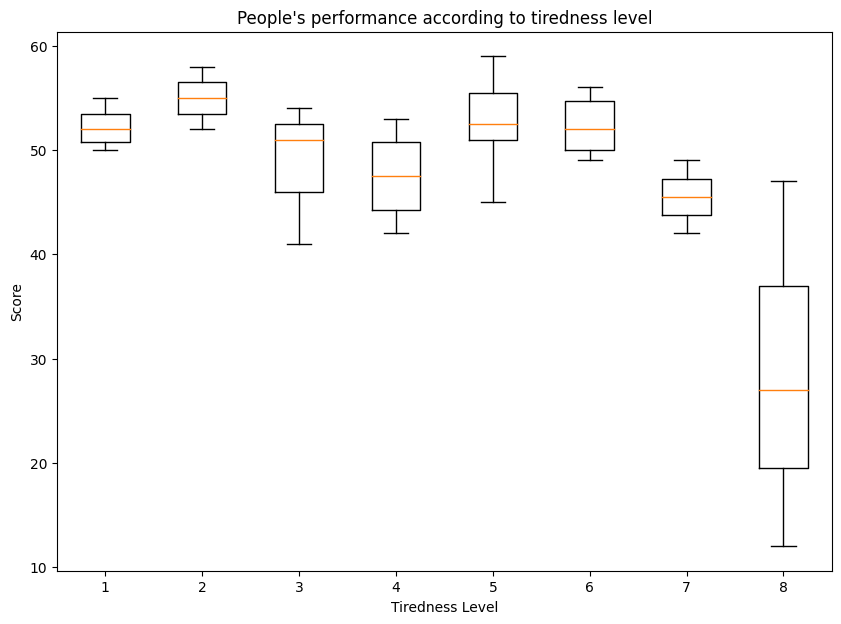

In [104]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# Assuming 'tiredness' column exists in your data
tiredness_levels = sorted(raw_data_1['tiredness'].unique())
data_by_tiredness = [raw_data_1[raw_data_1['tiredness'] == level]['score'] for level in tiredness_levels]

ax.boxplot(data_by_tiredness)

ax.set_title("People's performance according to tiredness level")
ax.set_xticklabels(tiredness_levels)
ax.set_xlabel("Tiredness Level")
ax.set_ylabel("Score")

plt.show()


/var/folders/gc/00b5w9z91fx53ly71p8wbvfm0000gn/T/ipykernel_79809/963846102.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tiredness_levels)


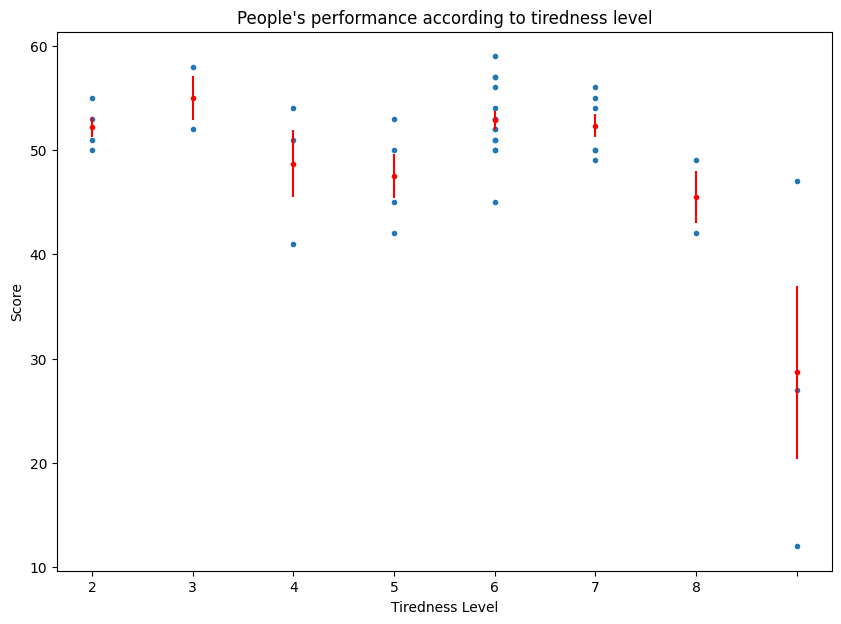

Significance: 0.0275


In [115]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

ax.plot(raw_data_1['tiredness'],raw_data_1['score'],'.')

# Error bars
for i, level in enumerate(tiredness_levels):
    scores = data_by_tiredness[i]
    mean_score = np.mean(scores)
    std_err = np.std(scores) / np.sqrt(len(scores)) 
    ax.errorbar(i+1, mean_score, yerr=std_err, fmt='o', color='red', markersize=3)

# Labels and title
ax.set_title("People's performance according to tiredness level")
ax.set_xticklabels(tiredness_levels)
ax.set_xlabel("Tiredness Level")
ax.set_ylabel("Score")

plt.show()

result = stats.ttest_ind(data_by_tiredness[3], data_by_tiredness[4])
print(f"Significance: {result.pvalue:.3g}")

